In [44]:
import time
import json
from copy import deepcopy
from pathlib import Path

import torch
import numpy as np

from cuticulus.datasets import BackgroundSub
from cuticulus.mlutils.torch import TorchDS, train_model, test_model

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})


In [20]:
if not Path('output').exists():
    Path('output').mkdir(parents=True)

In [21]:
device = torch.device('cuda:0')
device2 = torch.device('cuda:1')

In [22]:
patch_size = (32, 32)
ds = BackgroundSub(
    size=patch_size,
)

# torch expects images to be in format (batch, channels, height, width)
ds.images = ds.images.transpose(0, 3, 1, 2)
ds.images = ds.images.astype(np.float32)

ds.stratified_split(n_samples=1000, clamp=True)
ds.split_validation()

train_images, train_labels = ds.train()
test_images, test_labels = ds.test()
val_images, val_labels = ds.validate()

[14:39:52] Building labels.                                                     ]8;id=981316;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=207322;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#81\81]8;;\

[14:39:53] Built labels.                                                        ]8;id=311881;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=500120;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#83\83]8;;\

           Building dataset.                                                    ]8;id=299148;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=820637;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#99\99]8;;\

[14:39:54] INFO     Image 58 is NA or not considered in this version.              ]8;id=287882;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=169394;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

[14:39:55] INFO     Image 14 is NA or not considered in this version.              ]8;id=823189;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=973248;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 53 is NA or not considered in this version.              ]8;id=758559;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=819844;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 19 is NA or not considered in this version.              ]8;id=700353;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=821997;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 27 is NA or not considered in this version.              ]8;id=99435;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=200653;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 9 is NA or not considered in this version.               ]8;id=577143;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=141403;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

[14:39:56] INFO     Image 25 is NA or not considered in this version.              ]8;id=423363;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=338751;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 12 is NA or not considered in this version.              ]8;id=117093;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=620350;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

[14:39:57] INFO     Image 69 is NA or not considered in this version.              ]8;id=999488;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=151447;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 60 is NA or not considered in this version.              ]8;id=795071;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=622998;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

           INFO     Image 48 is NA or not considered in this version.              ]8;id=987119;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py\sub.py]8;;\:]8;id=729204;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/sub.py#184\184]8;;\

[14:39:57] Built dataset.                                                      ]8;id=222463;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=439253;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#104\104]8;;\

           Unique images considered: 48765                                     ]8;id=352120;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=165843;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#135\135]8;;\

           Samples per class:                                                  ]8;id=305135;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=69436;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 46999                                                            ]8;id=105589;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=99510;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 1766                                                             ]8;id=168559;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=491945;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           After splitting train and test:                                     ]8;id=76215;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=935167;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#88\88]8;;\

           Training set:                                                      ]8;id=4594;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=495575;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#100\100]8;;\

           Samples per class:                                                  ]8;id=177582;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=261159;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 1000                                                             ]8;id=200161;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=106999;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 1000                                                             ]8;id=360014;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=898963;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           Testing set:                                                       ]8;id=322238;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=62211;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#104\104]8;;\

           Samples per class:                                                  ]8;id=704072;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=117820;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 766                                                              ]8;id=97735;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=293547;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 766                                                              ]8;id=734182;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=666618;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           After splitting validation:                                        ]8;id=991110;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=750264;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#136\136]8;;\

           Training set:                                                      ]8;id=197904;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=495110;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#100\100]8;;\

[14:39:58] Samples per class:                                                  ]8;id=378998;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=451331;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 1000                                                             ]8;id=224337;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=185991;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 1000                                                             ]8;id=339765;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=320768;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           Testing set:                                                       ]8;id=739798;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=571486;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#104\104]8;;\

           Samples per class:                                                  ]8;id=944143;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=754541;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 372                                                              ]8;id=138151;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=350682;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 394                                                              ]8;id=918578;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=28227;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           Validation set:                                                    ]8;id=109121;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py\splitter.py]8;;\:]8;id=127966;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/splitter.py#109\109]8;;\

           Samples per class:                                                  ]8;id=461532;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=161349;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#128\128]8;;\

           0: 394                                                              ]8;id=859287;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=985961;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

           1: 372                                                              ]8;id=474660;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py\builder.py]8;;\:]8;id=866629;file:///home/ngardn10/projects/cuticulus/cuticulus/core/datasets/builder.py#131\131]8;;\

In [23]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)
model.eval()

Using cache found in /home/ngardn10/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
model = model.to(device)
params_to_update = model.parameters()
print("Params to learn:")

params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)


# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
collator = torch.utils.data.dataloader.default_collate

Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

In [25]:
train_loader = torch.utils.data.DataLoader(
    dataset=TorchDS(train_images, train_labels),
    batch_size=16,
    shuffle=True,
    collate_fn=collator,
)
val_loader = torch.utils.data.DataLoader(
    dataset=TorchDS(val_images, val_labels),
    batch_size=16,
    shuffle=True,
    collate_fn=collator,
)

In [26]:
model, hist = train_model(
    model,
    dataloaders={
        "train": train_loader,
        "val": val_loader
    },
    criterion=criterion,
    optimizer=optimizer_ft,
    num_epochs=100,
    device=device,
)

[14:39:59] Epoch 0/99                                                             ]8;id=498481;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=679716;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=343328;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=680169;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:01] train Loss: 0.6008 Acc: 0.7240                                        ]8;id=824553;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=556510;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.4771 Acc: 0.7728                                          ]8;id=167566;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=456711;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 1/99                                                             ]8;id=541141;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=968839;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=734765;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=992316;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:03] train Loss: 0.4657 Acc: 0.7815                                        ]8;id=6059;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=180250;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.4426 Acc: 0.7898                                          ]8;id=924968;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=282905;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 2/99                                                             ]8;id=714725;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=883661;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=549640;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=911733;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:05] train Loss: 0.3999 Acc: 0.8145                                        ]8;id=674856;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=42545;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.5131 Acc: 0.7755                                          ]8;id=883442;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=851583;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 3/99                                                             ]8;id=317515;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=873210;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=851543;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=989017;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:07] train Loss: 0.3492 Acc: 0.8380                                        ]8;id=582999;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=391489;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.5061 Acc: 0.7742                                          ]8;id=166291;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=274385;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 4/99                                                             ]8;id=53718;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=530378;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=56819;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=144635;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:09] train Loss: 0.3238 Acc: 0.8645                                        ]8;id=849660;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=852577;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.5856 Acc: 0.7337                                          ]8;id=746744;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=226746;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 5/99                                                             ]8;id=507738;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=564014;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=910091;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=37204;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:11] train Loss: 0.2862 Acc: 0.8825                                        ]8;id=913608;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=669885;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.4943 Acc: 0.7689                                          ]8;id=561557;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=832420;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 6/99                                                             ]8;id=696720;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=316059;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=710883;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=702359;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:12] train Loss: 0.2943 Acc: 0.8920                                        ]8;id=263463;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=675836;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:13] val Loss: 0.5706 Acc: 0.7559                                          ]8;id=649792;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=733026;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 7/99                                                             ]8;id=238927;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=27402;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=982263;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=904456;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:14] train Loss: 0.1959 Acc: 0.9205                                        ]8;id=951534;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=322175;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:15] val Loss: 0.6724 Acc: 0.7833                                          ]8;id=973872;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=550507;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 8/99                                                             ]8;id=790408;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=725697;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=336704;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=768338;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:16] train Loss: 0.2039 Acc: 0.9305                                        ]8;id=23021;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=799886;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.6798 Acc: 0.7820                                          ]8;id=60734;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=534532;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 9/99                                                             ]8;id=90273;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=698694;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=729316;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=384001;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:18] train Loss: 0.1663 Acc: 0.9340                                        ]8;id=401633;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=641649;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.7223 Acc: 0.7742                                          ]8;id=218404;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=919707;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 10/99                                                            ]8;id=690442;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=876687;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=447798;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=463445;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:20] train Loss: 0.1531 Acc: 0.9445                                        ]8;id=673840;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=13978;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:21] val Loss: 0.6608 Acc: 0.7637                                          ]8;id=827036;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=425921;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 11/99                                                            ]8;id=223347;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=238314;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=722399;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=139372;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:22] train Loss: 0.1356 Acc: 0.9485                                        ]8;id=333028;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=486792;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.7393 Acc: 0.7715                                          ]8;id=139361;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=889348;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 12/99                                                            ]8;id=399618;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=852146;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=648057;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=969935;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:24] train Loss: 0.1162 Acc: 0.9525                                        ]8;id=682722;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=667334;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.7967 Acc: 0.7454                                          ]8;id=538238;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=507193;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 13/99                                                            ]8;id=912161;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=745873;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=219081;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=227012;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:26] train Loss: 0.1103 Acc: 0.9620                                        ]8;id=949000;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=329531;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.6735 Acc: 0.7742                                          ]8;id=902181;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=226181;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 14/99                                                            ]8;id=738613;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=675583;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=473789;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=475156;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:28] train Loss: 0.1150 Acc: 0.9560                                        ]8;id=569659;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=100774;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8522 Acc: 0.7768                                          ]8;id=423358;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=530848;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 15/99                                                            ]8;id=279914;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=277581;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=891886;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=766420;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:30] train Loss: 0.1317 Acc: 0.9635                                        ]8;id=914226;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=527759;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9422 Acc: 0.7807                                          ]8;id=464628;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=818306;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 16/99                                                            ]8;id=985066;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=422261;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=30848;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=954413;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:32] train Loss: 0.1129 Acc: 0.9545                                        ]8;id=715055;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=696291;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.7821 Acc: 0.7859                                          ]8;id=528062;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=691979;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 17/99                                                            ]8;id=597909;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=422113;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=315578;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=534146;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:34] train Loss: 0.0713 Acc: 0.9715                                        ]8;id=96573;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=750611;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8856 Acc: 0.7963                                          ]8;id=885207;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=474741;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 18/99                                                            ]8;id=983073;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=445321;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=299421;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=695365;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:36] train Loss: 0.1110 Acc: 0.9670                                        ]8;id=864503;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=884315;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8043 Acc: 0.7650                                          ]8;id=131233;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=74479;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 19/99                                                            ]8;id=137233;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=271309;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=865802;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=173842;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:37] train Loss: 0.0601 Acc: 0.9775                                        ]8;id=516178;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=499173;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:38] val Loss: 0.7660 Acc: 0.7885                                          ]8;id=566998;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=28476;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 20/99                                                            ]8;id=91274;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=43464;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=11028;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=252321;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:39] train Loss: 0.0811 Acc: 0.9710                                        ]8;id=320335;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=165730;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:40] val Loss: 0.8227 Acc: 0.7885                                          ]8;id=405350;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=944766;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 21/99                                                            ]8;id=138209;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=543749;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=961659;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=803342;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:41] train Loss: 0.0634 Acc: 0.9800                                        ]8;id=351419;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=933564;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8574 Acc: 0.7898                                          ]8;id=611632;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=383202;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 22/99                                                            ]8;id=116243;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=920784;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=351848;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=369916;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:43] train Loss: 0.0499 Acc: 0.9850                                        ]8;id=831825;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=512384;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8607 Acc: 0.7728                                          ]8;id=975159;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=477031;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 23/99                                                            ]8;id=639329;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=358901;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=90986;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=268294;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:45] train Loss: 0.0436 Acc: 0.9880                                        ]8;id=113432;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=123306;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9343 Acc: 0.7768                                          ]8;id=811184;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=975122;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 24/99                                                            ]8;id=912802;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=495908;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=121495;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=958962;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:47] train Loss: 0.0530 Acc: 0.9835                                        ]8;id=112704;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=176422;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8319 Acc: 0.8029                                          ]8;id=249842;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=941891;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 25/99                                                            ]8;id=329310;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=830201;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=781493;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=32591;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:49] train Loss: 0.0585 Acc: 0.9810                                        ]8;id=400023;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=635052;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8384 Acc: 0.8055                                          ]8;id=80628;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=951844;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 26/99                                                            ]8;id=471658;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=679928;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=591923;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=357922;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:51] train Loss: 0.0572 Acc: 0.9795                                        ]8;id=234099;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=629952;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8447 Acc: 0.8107                                          ]8;id=131149;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=463261;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 27/99                                                            ]8;id=594467;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=847784;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=541176;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=134283;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:53] train Loss: 0.0199 Acc: 0.9925                                        ]8;id=116282;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=889360;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9142 Acc: 0.7911                                          ]8;id=521304;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=492130;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 28/99                                                            ]8;id=120168;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=220044;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=40170;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=558716;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:55] train Loss: 0.0269 Acc: 0.9895                                        ]8;id=115008;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=526993;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9834 Acc: 0.7768                                          ]8;id=740069;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=341206;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 29/99                                                            ]8;id=278034;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=590669;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=333862;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=429404;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:56] train Loss: 0.0354 Acc: 0.9855                                        ]8;id=689354;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=851873;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:57] val Loss: 0.9323 Acc: 0.7833                                          ]8;id=240643;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=405451;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 30/99                                                            ]8;id=936877;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=291547;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=578093;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=898244;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:40:58] train Loss: 0.0305 Acc: 0.9905                                        ]8;id=638247;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=880954;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:40:59] val Loss: 0.9747 Acc: 0.7898                                          ]8;id=453357;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=324728;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 31/99                                                            ]8;id=993319;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=392586;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=24275;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=85473;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:00] train Loss: 0.0287 Acc: 0.9910                                        ]8;id=187212;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=491073;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0942 Acc: 0.7885                                          ]8;id=918981;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=191234;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 32/99                                                            ]8;id=226939;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=436023;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=600606;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=56212;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:02] train Loss: 0.0410 Acc: 0.9875                                        ]8;id=735500;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=587041;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9279 Acc: 0.7781                                          ]8;id=406862;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=822549;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 33/99                                                            ]8;id=236290;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=634650;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=223058;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=689294;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:04] train Loss: 0.0385 Acc: 0.9895                                        ]8;id=513692;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=2942;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0285 Acc: 0.7820                                          ]8;id=604806;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=931210;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 34/99                                                            ]8;id=931063;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=381187;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=750407;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=334728;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:06] train Loss: 0.0186 Acc: 0.9935                                        ]8;id=5111;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=97366;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0062 Acc: 0.7807                                          ]8;id=492233;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=450495;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 35/99                                                            ]8;id=202422;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=855334;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=702863;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=616315;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:08] train Loss: 0.0073 Acc: 0.9985                                        ]8;id=934904;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=828836;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9998 Acc: 0.7820                                          ]8;id=690604;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=615860;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 36/99                                                            ]8;id=511298;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=622424;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=677336;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=239567;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:10] train Loss: 0.0149 Acc: 0.9960                                        ]8;id=273065;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=854676;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9786 Acc: 0.7794                                          ]8;id=318643;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=830503;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 37/99                                                            ]8;id=864557;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=282577;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=312616;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=839280;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:12] train Loss: 0.0157 Acc: 0.9950                                        ]8;id=387479;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=886647;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9804 Acc: 0.7728                                          ]8;id=6069;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=367385;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 38/99                                                            ]8;id=600308;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=228585;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=370019;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=603643;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:14] train Loss: 0.0190 Acc: 0.9940                                        ]8;id=518086;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=234668;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8825 Acc: 0.7794                                          ]8;id=47150;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=535522;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 39/99                                                            ]8;id=903082;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=342097;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=676421;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=798269;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:15] train Loss: 0.0088 Acc: 0.9965                                        ]8;id=933304;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=503338;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:16] val Loss: 0.9997 Acc: 0.7950                                          ]8;id=935608;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=258645;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 40/99                                                            ]8;id=660691;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=512043;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=152070;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=709129;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:17] train Loss: 0.0081 Acc: 0.9970                                        ]8;id=563992;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=999797;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:18] val Loss: 1.0752 Acc: 0.7898                                          ]8;id=333272;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=579997;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 41/99                                                            ]8;id=916293;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=97285;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=816152;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=323705;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:19] train Loss: 0.0097 Acc: 0.9970                                        ]8;id=126598;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=59853;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0834 Acc: 0.7859                                          ]8;id=897802;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=284593;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 42/99                                                            ]8;id=444970;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=673012;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=109237;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=419130;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:21] train Loss: 0.0218 Acc: 0.9950                                        ]8;id=687836;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=366127;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1644 Acc: 0.7885                                          ]8;id=609531;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=72730;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 43/99                                                            ]8;id=204756;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=270358;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=899836;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=445957;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:23] train Loss: 0.0190 Acc: 0.9930                                        ]8;id=690717;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=194142;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1662 Acc: 0.7715                                          ]8;id=502788;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=860392;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 44/99                                                            ]8;id=466874;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=193062;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=25668;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=867821;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:25] train Loss: 0.0533 Acc: 0.9825                                        ]8;id=623748;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=794617;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2363 Acc: 0.7885                                          ]8;id=828377;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=9539;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 45/99                                                            ]8;id=297193;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=130499;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=335226;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=76625;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:27] train Loss: 0.0365 Acc: 0.9875                                        ]8;id=103609;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=768331;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0360 Acc: 0.7637                                          ]8;id=305122;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=478364;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 46/99                                                            ]8;id=477375;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=818133;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=161665;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=484597;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:29] train Loss: 0.0184 Acc: 0.9925                                        ]8;id=204313;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=124060;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.8772 Acc: 0.7950                                          ]8;id=589562;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=280528;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 47/99                                                            ]8;id=82073;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=461806;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=417542;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=964989;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:31] train Loss: 0.0141 Acc: 0.9960                                        ]8;id=929392;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=323;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9254 Acc: 0.7977                                          ]8;id=998208;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=256521;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 48/99                                                            ]8;id=710826;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=201180;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=732415;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=959913;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:32] train Loss: 0.0226 Acc: 0.9935                                        ]8;id=336367;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=695764;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:33] val Loss: 0.9714 Acc: 0.7911                                          ]8;id=286670;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=5287;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 49/99                                                            ]8;id=574322;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=181847;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=582424;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=189110;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:34] train Loss: 0.0152 Acc: 0.9975                                        ]8;id=339302;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=60561;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:35] val Loss: 1.2088 Acc: 0.7820                                          ]8;id=244177;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=172158;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 50/99                                                            ]8;id=301474;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=191015;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=355316;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=950248;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:36] train Loss: 0.0127 Acc: 0.9970                                        ]8;id=803956;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=604538;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0284 Acc: 0.7924                                          ]8;id=108890;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=582297;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 51/99                                                            ]8;id=392873;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=974747;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=170256;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=448253;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:38] train Loss: 0.0068 Acc: 0.9975                                        ]8;id=662771;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=678277;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0241 Acc: 0.7924                                          ]8;id=244312;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=558529;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 52/99                                                            ]8;id=986070;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=552901;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=815960;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=675875;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:40] train Loss: 0.0081 Acc: 0.9975                                        ]8;id=338381;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=347903;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1214 Acc: 0.7807                                          ]8;id=402381;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=361459;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 53/99                                                            ]8;id=325134;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=15079;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=752250;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=153766;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:42] train Loss: 0.0061 Acc: 0.9975                                        ]8;id=852776;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=632502;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0416 Acc: 0.7977                                          ]8;id=536116;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=517851;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 54/99                                                            ]8;id=939418;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=866581;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=436204;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=427301;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:44] train Loss: 0.0357 Acc: 0.9915                                        ]8;id=36041;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=447410;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9770 Acc: 0.7911                                          ]8;id=624195;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=322923;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 55/99                                                            ]8;id=257377;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=535287;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=367972;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=430157;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:46] train Loss: 0.0142 Acc: 0.9950                                        ]8;id=930469;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=353184;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9159 Acc: 0.7977                                          ]8;id=101832;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=585668;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 56/99                                                            ]8;id=191750;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=341968;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=981141;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=670656;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:48] train Loss: 0.0263 Acc: 0.9925                                        ]8;id=901124;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=839641;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9865 Acc: 0.8003                                          ]8;id=395238;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=786159;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 57/99                                                            ]8;id=425257;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=203840;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=331584;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=804391;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:50] train Loss: 0.0193 Acc: 0.9945                                        ]8;id=918690;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=12030;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1184 Acc: 0.7872                                          ]8;id=706023;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=733222;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 58/99                                                            ]8;id=840329;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=41876;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=1377;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=963044;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:51] train Loss: 0.0087 Acc: 0.9975                                        ]8;id=46427;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=595523;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:52] val Loss: 1.0282 Acc: 0.7924                                          ]8;id=947990;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=109338;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 59/99                                                            ]8;id=81655;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=2417;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=327677;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=849462;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:53] train Loss: 0.0049 Acc: 0.9990                                        ]8;id=975709;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=251074;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:41:54] val Loss: 1.0159 Acc: 0.7977                                          ]8;id=231361;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=537443;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 60/99                                                            ]8;id=411508;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=659988;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=870569;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=159151;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:55] train Loss: 0.0317 Acc: 0.9925                                        ]8;id=995366;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=941045;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1599 Acc: 0.7859                                          ]8;id=207516;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=147542;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 61/99                                                            ]8;id=596741;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=114879;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=995938;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=372109;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:57] train Loss: 0.0124 Acc: 0.9960                                        ]8;id=884045;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=459905;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0099 Acc: 0.7859                                          ]8;id=632334;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=85645;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 62/99                                                            ]8;id=257984;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=192261;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=556825;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=784293;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:41:59] train Loss: 0.0076 Acc: 0.9980                                        ]8;id=520228;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=605613;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0573 Acc: 0.7963                                          ]8;id=967339;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=142507;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 63/99                                                            ]8;id=569731;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=637734;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=422241;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=65443;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:01] train Loss: 0.0058 Acc: 0.9975                                        ]8;id=750156;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=86685;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0802 Acc: 0.7898                                          ]8;id=963808;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=327323;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 64/99                                                            ]8;id=957801;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=936664;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=621614;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=779290;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:03] train Loss: 0.0071 Acc: 0.9975                                        ]8;id=846668;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=67051;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1305 Acc: 0.7728                                          ]8;id=228676;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=159147;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 65/99                                                            ]8;id=560757;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=447813;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=991723;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=115766;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:05] train Loss: 0.0041 Acc: 0.9995                                        ]8;id=479623;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=885150;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1277 Acc: 0.7937                                          ]8;id=689101;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=164821;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 66/99                                                            ]8;id=973008;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=865714;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=547884;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=982152;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:07] train Loss: 0.0060 Acc: 0.9965                                        ]8;id=647128;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=983899;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1803 Acc: 0.7781                                          ]8;id=714577;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=166011;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 67/99                                                            ]8;id=364879;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=682583;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=878898;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=654443;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:09] train Loss: 0.0026 Acc: 0.9990                                        ]8;id=516822;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=234666;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1018 Acc: 0.7872                                          ]8;id=577029;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=405494;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 68/99                                                            ]8;id=371509;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=383100;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=400081;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=458014;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:10] train Loss: 0.0141 Acc: 0.9970                                        ]8;id=278662;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=872166;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:42:11] val Loss: 1.2141 Acc: 0.7742                                          ]8;id=150645;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=230874;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 69/99                                                            ]8;id=31761;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=504975;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=692083;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=561034;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:12] train Loss: 0.0162 Acc: 0.9930                                        ]8;id=705005;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=898487;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0279 Acc: 0.7911                                          ]8;id=821419;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=403736;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 70/99                                                            ]8;id=596008;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=888128;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=548961;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=268278;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:14] train Loss: 0.0039 Acc: 0.9995                                        ]8;id=140399;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=95474;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0562 Acc: 0.7820                                          ]8;id=722481;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=136324;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 71/99                                                            ]8;id=995805;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=983293;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=165106;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=520078;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:16] train Loss: 0.0185 Acc: 0.9960                                        ]8;id=957268;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=784232;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0522 Acc: 0.7924                                          ]8;id=365346;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=464467;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 72/99                                                            ]8;id=709283;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=16956;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=999613;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=703454;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:18] train Loss: 0.0025 Acc: 0.9995                                        ]8;id=332174;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=675758;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0617 Acc: 0.7950                                          ]8;id=331536;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=751025;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 73/99                                                            ]8;id=549361;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=546472;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=91298;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=78230;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:20] train Loss: 0.0078 Acc: 0.9985                                        ]8;id=335600;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=68763;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0171 Acc: 0.7937                                          ]8;id=529296;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=822054;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 74/99                                                            ]8;id=197343;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=151456;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=601314;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=637123;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:22] train Loss: 0.0083 Acc: 0.9970                                        ]8;id=915262;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=362096;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0504 Acc: 0.8003                                          ]8;id=702035;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=965996;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 75/99                                                            ]8;id=759331;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=887419;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=789730;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=744884;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:24] train Loss: 0.0102 Acc: 0.9965                                        ]8;id=385975;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=788286;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1385 Acc: 0.8107                                          ]8;id=873152;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=312726;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 76/99                                                            ]8;id=158189;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=438537;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=789860;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=242717;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:25] train Loss: 0.0101 Acc: 0.9960                                        ]8;id=6508;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=93784;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:42:26] val Loss: 1.1911 Acc: 0.7846                                          ]8;id=101734;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=692076;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 77/99                                                            ]8;id=432757;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=291001;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=660830;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=496732;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:27] train Loss: 0.0109 Acc: 0.9955                                        ]8;id=146640;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=72154;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:42:28] val Loss: 1.0744 Acc: 0.7977                                          ]8;id=644334;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=946125;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 78/99                                                            ]8;id=322075;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=946964;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=683688;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=563324;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:29] train Loss: 0.0075 Acc: 0.9965                                        ]8;id=890844;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=818746;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2359 Acc: 0.7833                                          ]8;id=681589;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=693903;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 79/99                                                            ]8;id=228893;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=686665;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=874276;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=515006;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:31] train Loss: 0.0053 Acc: 0.9980                                        ]8;id=898332;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=369366;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0508 Acc: 0.8146                                          ]8;id=114999;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=855317;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 80/99                                                            ]8;id=91571;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=105852;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=175362;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=843385;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:33] train Loss: 0.0039 Acc: 0.9985                                        ]8;id=159316;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=542299;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0890 Acc: 0.7990                                          ]8;id=629923;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=430043;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 81/99                                                            ]8;id=119745;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=478625;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=655734;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=372094;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:35] train Loss: 0.0079 Acc: 0.9975                                        ]8;id=956411;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=246119;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0490 Acc: 0.7911                                          ]8;id=399978;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=731502;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 82/99                                                            ]8;id=64419;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=143016;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=428880;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=664491;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:37] train Loss: 0.0023 Acc: 0.9995                                        ]8;id=785350;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=5828;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0875 Acc: 0.8003                                          ]8;id=726607;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=913033;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 83/99                                                            ]8;id=747289;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=87921;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=818771;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=941842;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:39] train Loss: 0.0134 Acc: 0.9955                                        ]8;id=872433;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=538807;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1155 Acc: 0.7702                                          ]8;id=249997;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=713339;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 84/99                                                            ]8;id=650319;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=316786;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=754212;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=965632;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:41] train Loss: 0.0195 Acc: 0.9920                                        ]8;id=591500;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=909733;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.3273 Acc: 0.7742                                          ]8;id=90949;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=425229;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 85/99                                                            ]8;id=961386;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=709637;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=278403;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=874535;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:43] train Loss: 0.0083 Acc: 0.9970                                        ]8;id=923242;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=128617;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.3083 Acc: 0.7872                                          ]8;id=807643;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=911199;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 86/99                                                            ]8;id=356360;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=331324;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=462141;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=219389;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:44] train Loss: 0.0184 Acc: 0.9950                                        ]8;id=271474;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=731671;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:42:45] val Loss: 1.3337 Acc: 0.7820                                          ]8;id=463877;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=16892;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 87/99                                                            ]8;id=555106;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=162656;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=471022;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=150081;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:46] train Loss: 0.0087 Acc: 0.9960                                        ]8;id=537419;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=678665;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:42:47] val Loss: 1.3063 Acc: 0.7807                                          ]8;id=543927;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=112881;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 88/99                                                            ]8;id=825348;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=520595;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=60793;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=594278;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:48] train Loss: 0.0037 Acc: 0.9990                                        ]8;id=287387;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=112756;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1839 Acc: 0.7807                                          ]8;id=894856;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=729621;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 89/99                                                            ]8;id=726463;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=443702;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=302354;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=672379;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:50] train Loss: 0.0043 Acc: 0.9980                                        ]8;id=800871;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=633687;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2620 Acc: 0.7663                                          ]8;id=371229;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=536671;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 90/99                                                            ]8;id=342722;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=670453;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=507546;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=179678;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:52] train Loss: 0.0088 Acc: 0.9980                                        ]8;id=505719;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=318507;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2583 Acc: 0.7833                                          ]8;id=860616;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=960699;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 91/99                                                            ]8;id=283055;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=695410;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=461258;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=904273;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:54] train Loss: 0.0020 Acc: 0.9995                                        ]8;id=448376;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=646898;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2639 Acc: 0.7911                                          ]8;id=790852;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=194779;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 92/99                                                            ]8;id=181094;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=683890;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=133151;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=118540;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:56] train Loss: 0.0032 Acc: 0.9985                                        ]8;id=796099;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=819604;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2243 Acc: 0.7911                                          ]8;id=485330;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=13987;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 93/99                                                            ]8;id=682106;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=790621;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=140112;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=257803;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:42:58] train Loss: 0.0010 Acc: 0.9995                                        ]8;id=982088;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=394686;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1913 Acc: 0.7885                                          ]8;id=832337;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=261546;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 94/99                                                            ]8;id=171490;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=986849;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=765737;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=534688;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:00] train Loss: 0.0621 Acc: 0.9855                                        ]8;id=61647;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=446396;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.3467 Acc: 0.7689                                          ]8;id=164640;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=94317;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 95/99                                                            ]8;id=523224;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=246891;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=854217;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=762800;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:02] train Loss: 0.0230 Acc: 0.9930                                        ]8;id=771971;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=370843;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.0009 Acc: 0.7768                                          ]8;id=852039;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=519728;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 96/99                                                            ]8;id=301242;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=610298;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=13184;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=868730;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:04] train Loss: 0.0088 Acc: 0.9980                                        ]8;id=500373;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=848780;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.2661 Acc: 0.7807                                          ]8;id=645384;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=834645;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 97/99                                                            ]8;id=960437;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=399843;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=662966;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=890893;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:06] train Loss: 0.0060 Acc: 0.9980                                        ]8;id=511915;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=210926;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 0.9972 Acc: 0.7924                                          ]8;id=176867;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=497248;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 98/99                                                            ]8;id=584220;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=796131;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=307561;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=390025;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:08] train Loss: 0.0024 Acc: 0.9995                                        ]8;id=827401;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=526331;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           val Loss: 1.1230 Acc: 0.7794                                          ]8;id=350429;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=656934;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Epoch 99/99                                                            ]8;id=977279;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=584490;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#63\63]8;;\

           ----------                                                             ]8;id=906110;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=380470;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#64\64]8;;\

[14:43:09] train Loss: 0.0019 Acc: 0.9995                                        ]8;id=357996;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=103537;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

[14:43:10] val Loss: 1.1169 Acc: 0.7885                                          ]8;id=731175;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=47572;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#109\109]8;;\

           Training complete in 3m 10s                                           ]8;id=89073;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=444330;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#128\128]8;;\

           Best val Acc: 0.814621                                                ]8;id=168128;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=911240;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#132\132]8;;\

In [27]:
train_acc = [hist['train_acc'][i].cpu().numpy() for i in range(len(hist['train_acc']))]
train_loss = hist['train_loss']

val_acc = [hist['val_acc'][i].cpu().numpy() for i in range(len(hist['val_acc']))]
val_loss = hist['val_loss']

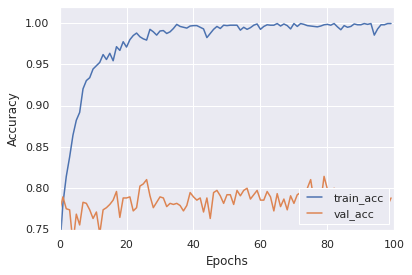

In [28]:
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.75, 1.02)
plt.savefig(Path('output/accuracy.png'))

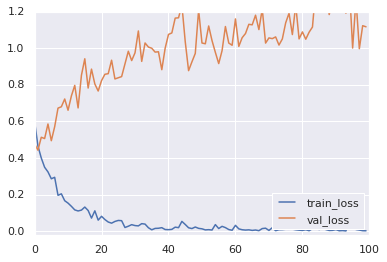

In [29]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend(loc='lower right')
plt.ylim(-0.02, 1.2)
plt.savefig(Path('output/loss.png'))

In [45]:
model2 = deepcopy(model).to(device2)
# calculate test image accuracy
test_loader = torch.utils.data.DataLoader(
    dataset=TorchDS(test_images, test_labels),
    batch_size=16,
    shuffle=False
)
test_acc, test_loss = test_model(model2, test_loader, criterion, device2)

[14:49:24] Loss: 0.7806 Acc: 0.7806                                              ]8;id=720945;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py\torch.py]8;;\:]8;id=610290;file:///home/ngardn10/projects/cuticulus/cuticulus/mlutils/torch.py#159\159]8;;\

In [46]:
outpath = Path('output/models/{0}'.format(int(time.time())))
outpath.mkdir(parents=True, exist_ok=True)

torch.save(model.state_dict(), str(outpath / 'model.pth'))
with open(str(outpath / 'res.json'), 'w') as fout:
    fout.write(json.dumps({
        'test_acc': test_acc.cpu().item(),
        'test_loss': test_loss,
    }))